In [1]:
from RsInstrument import *  # The RsInstrument package is hosted on pypi.org, see Readme.txt for more details
from time import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rtb = RsInstrument('TCPIP::169.254.146.117::INSTR', True, False)
rtb.visa_timeout = 10000  # Timeout for VISA Read Operations
rtb.opc_timeout = 15000  # Timeout for opc-synchronised operations
rtb.instrument_status_checking = True  # Error check after each command

In [3]:
print(f'RTB2000 IDN: {rtb.idn_string}')
print(f'RTB2000 Options: {",".join(rtb.instrument_options)}')

rtb.clear_status()
rtb.reset()

RTB2000 IDN: Rohde&Schwarz,RTB2004,1333.1005k04/102215,01.210
RTB2000 Options: B242


In [4]:
rtb.write_str("TIM:ACQT 0.0001")  # 10ms Acquisition time
rtb.write_str("CHAN1:RANG 10")  # Horizontal range 5V (0.5V/div)
rtb.write_str("CHAN1:OFFS 0.0")  # Offset 0
rtb.write_str("CHAN1:COUP ACL")  # Coupling AC 1MOhm
rtb.write_str("CHAN1:STAT ON")  # Switch Channel 1 ON

In [5]:
rtb.write_str("TRIG:A:MODE NORM")  # Trigger Auto mode in case of no signal is applied
rtb.write_str("TRIG:A:TYPE EDGE;:TRIG:A:EDGE:SLOP POS")  # Trigger type Edge Positive
rtb.write_str("TRIG:A:SOUR CH1")  # Trigger source CH1
rtb.write_str("TRIG:A:LEV1 1")  # Trigger level 0.05V
rtb.query_opc()  # Using *OPC? query waits until all the instrument settings are finished

True

In [6]:
# rtb.write_str("SYSTem:COMMunicate:INTerface:ETHernet:TRANsfer FD100")
# rtb.write_str("CHAN1:TYPE HRES")
# rtb.write_str("CHAN1:DATA:POIN DMAX")


In [7]:
rtb.VisaTimeout = 10000  # Acquisition timeout - set it higher than the acquisition time


In [8]:
rtb.query_opc()  # Using *OPC? query waits until the instrument finished the Acquisition

True

In [24]:
rtb.write_str("RUNContinous")
rtb.write_str("ACQuire:POINts:AUT OFF")
rtb.write_str("ACQuire:POINts 10000")
rtb.write_str("ACQuire:NSINgle:COUNt 10")
# rtb.query("ACQuire:SEGM:STAT ON")
print(rtb.query("ACQuire:POINts?"))
print(rtb.query("ACQuire:SRATe?"))
rtb.data_chunk_size = 1e20
traces = []
for x in range(100):        
    # rtb.query_bin_block_to_file('FORM REAL,32;:CHAN1:DATA?',"C:/Users/nEXO/Desktop/test/test.bin",append=True)
    traces.append(rtb.query_bin_or_ascii_float_list('CHAN1:DATA?'))  # Query ascii array of floats
    print(rtb.query("CHANnel1:DATA:HEADer?"))
print(np.shape(np.array(traces)))

10000
6.25000000000E+08
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.0080E-06,6256,1
-5.0000E-06,5.00

6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256
6256


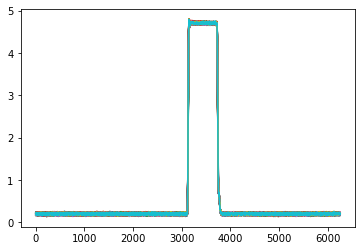

In [13]:
for trace in traces:
    # print(trace)
    print(len(trace))
    plt.plot(trace)
# plt.xlim(6000,6500)